<h2>Data Visualization

In [35]:
# Initializing spark session 
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName("Test").getOrCreate() 

# Import relevant packages 
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.functions import * 
from pyspark.sql import DataFrame 
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
# define data path
data_path = "/Users/lanzia/Desktop/Study/FS 2025/01.1st Semester/Introduction to Data in Business Analytics/Project/Data/Saved_Tables/"

In [37]:
# define the columns needed to be cleaned later
ranges = [(202319, 202326), (202401, 202426), (202501, 202518)]
numeric_fields = [StructField(str(i), DoubleType(), True) 
                  for start, end in ranges for i in range(start, end + 1)
                  ]
cols_to_clean = ['avg_' + str(i) for start, end in ranges for i in range(start, end + 1)]

In [38]:
# define financial data columns
fin_data_cols = ['avg_Closing_Price',
                 'avg_Market_Value',
                 'avg_Sales',
                 'avg_1_Year_Growth_Total_Sales',
                 'avg_FE_Sales_Mean_FY1_Roll',
                 'avg_EBITDA_Oper_Income',
                 'avg_FE_Ebitda_Mean_FY1_Roll',
                 'avg_Earns_Per_Share',
                 'avg_FE_Eps_Mean_FY1_Roll',
                 'avg_FE_Val_Roe_Mean_FY1_Roll',
                 'avg_Return_on_Avg_Total_Assets',
                 'avg_FE_Val_Pe_Mean_FY1_Roll',
                 'avg_Resrch_and_Develop_Expense'
                 ]

<h4>Part 1: Overall AI Usage and Acceptance Rate Visualization

In [39]:
# read the data
AI_usage = pd.read_excel(data_path + "02_AI_usage_upd.xlsx", engine="openpyxl")
AI_acceptance = pd.read_excel(data_path + "02_AI_acceptance_upd.xlsx", engine="openpyxl")

AI_usage = spark.createDataFrame(AI_usage)
AI_acceptance = spark.createDataFrame(AI_acceptance)

**Average AI usage & acceptance rate across the survey preiod**

In [40]:
# for AI usage:
agg_exprs = [F.avg(c).alias(c) for c in cols_to_clean if c in AI_usage.columns]
AI_usage_avg = AI_usage.groupBy().agg(*agg_exprs)

for c in cols_to_clean:
    if c in AI_usage_avg.columns:
        AI_usage_avg = (AI_usage_avg
                        .withColumn(c, round(c, 1))
                        )

AI_usage_avg.show()

+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|avg_202319|avg_202320|avg_202321|avg_202322|avg_202323|avg_202324|avg_202325|avg_202326|avg_202401|avg_202402|avg_202403|avg_202404|avg_202405|avg_202406|avg_202407|avg_202408|avg_202409|avg_202410|avg_202411|avg_202412|avg_202413|avg_202414|avg_202415|avg_202416|avg_202417|avg_202418|avg_202419|avg_202420|avg_202421|avg_202422|avg_202423|avg_202424|avg_202425|avg_202426|avg_202501|avg_202502|avg_202503|avg_202504|avg_202

In [41]:
# for AI acceptance:
AI_acceptance_avg = AI_acceptance.groupBy().agg(*agg_exprs)

for c in cols_to_clean:
    if c in AI_acceptance_avg.columns:
        AI_acceptance_avg = (AI_acceptance_avg
                        .withColumn(c, round(c, 1))
                        )

AI_acceptance_avg.show()

+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|avg_202319|avg_202320|avg_202321|avg_202322|avg_202323|avg_202324|avg_202325|avg_202326|avg_202401|avg_202402|avg_202403|avg_202404|avg_202405|avg_202406|avg_202407|avg_202408|avg_202409|avg_202410|avg_202411|avg_202412|avg_202413|avg_202414|avg_202415|avg_202416|avg_202417|avg_202418|avg_202419|avg_202420|avg_202421|avg_202422|avg_202423|avg_202424|avg_202425|avg_202426|avg_202501|avg_202502|avg_202503|avg_202504|avg_202

In [42]:
# pivot the table
expr_usage = "stack({0}, {1}) as (week, avg_rate)".format(len(AI_usage_avg.columns),", ".join([f"'{c}', {c}" for c in AI_usage_avg.columns]))
expr_acceptance = "stack({0}, {1}) as (week, avg_rate)".format(len(AI_acceptance_avg.columns),", ".join([f"'{c}', {c}" for c in AI_acceptance_avg.columns]))

In [43]:
# AI usage
AI_usage_avg_pivot = (AI_usage_avg
                      .selectExpr(expr_usage)
                      .withColumn("week", F.regexp_replace("week", "avg_", "")))
AI_usage_avg_pivot.show(5)

+------+--------+
|  week|avg_rate|
+------+--------+
|202319|     3.7|
|202320|     3.7|
|202321|     3.5|
|202322|     3.8|
|202323|     4.4|
+------+--------+
only showing top 5 rows


In [44]:
# AI acceptance
AI_acceptance_avg_pivot = (AI_acceptance_avg
                           .selectExpr(expr_acceptance)
                           .withColumn("week", F.regexp_replace("week", "avg_", "")))
AI_acceptance_avg_pivot.show(5)

+------+--------+
|  week|avg_rate|
+------+--------+
|202319|     6.0|
|202320|     5.7|
|202321|     6.5|
|202322|     6.2|
|202323|     6.6|
+------+--------+
only showing top 5 rows


In [45]:
pd_AI_usage_avg_pivot = AI_usage_avg_pivot.toPandas()
pd_AI_acceptance_avg_pivot = AI_acceptance_avg_pivot.toPandas()

pd_AI_usage_avg_pivot['week'] = pd_AI_usage_avg_pivot['week'].astype(str)
pd_AI_acceptance_avg_pivot['week'] = pd_AI_acceptance_avg_pivot['week'].astype(str)

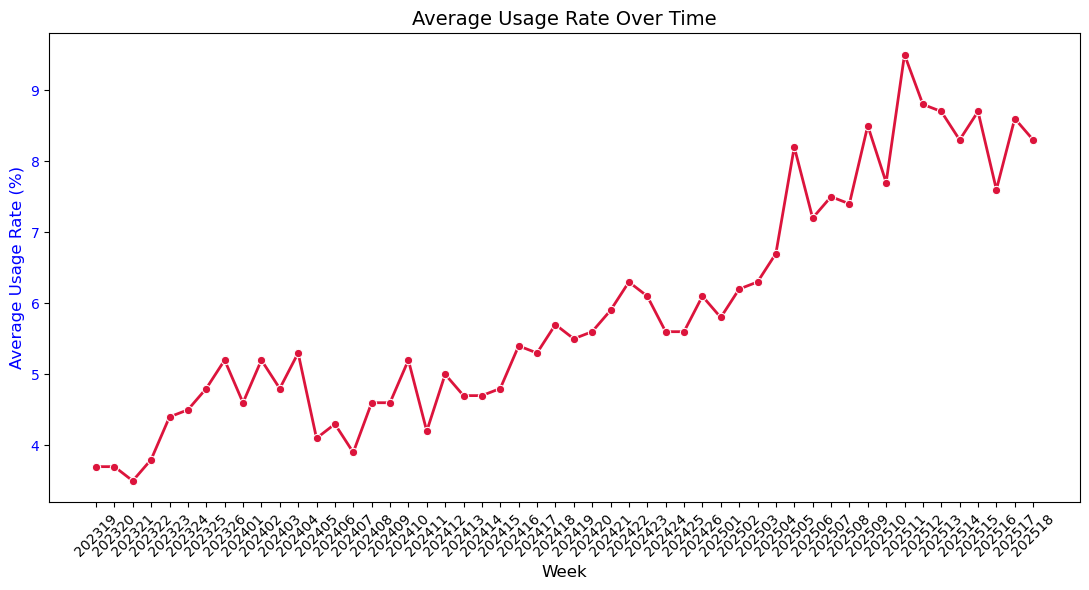

In [46]:
# AI usage
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.lineplot(data=pd_AI_usage_avg_pivot,
             x="week",
             y="avg_rate",
             marker="o",
             color="crimson",
             linewidth=2,
             ax=ax1)

ax1.set_xlabel("Week", fontsize=12)
ax1.set_ylabel("Average Usage Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
plt.title("Average Usage Rate Over Time", fontsize=14)
plt.tight_layout()
plt.show()

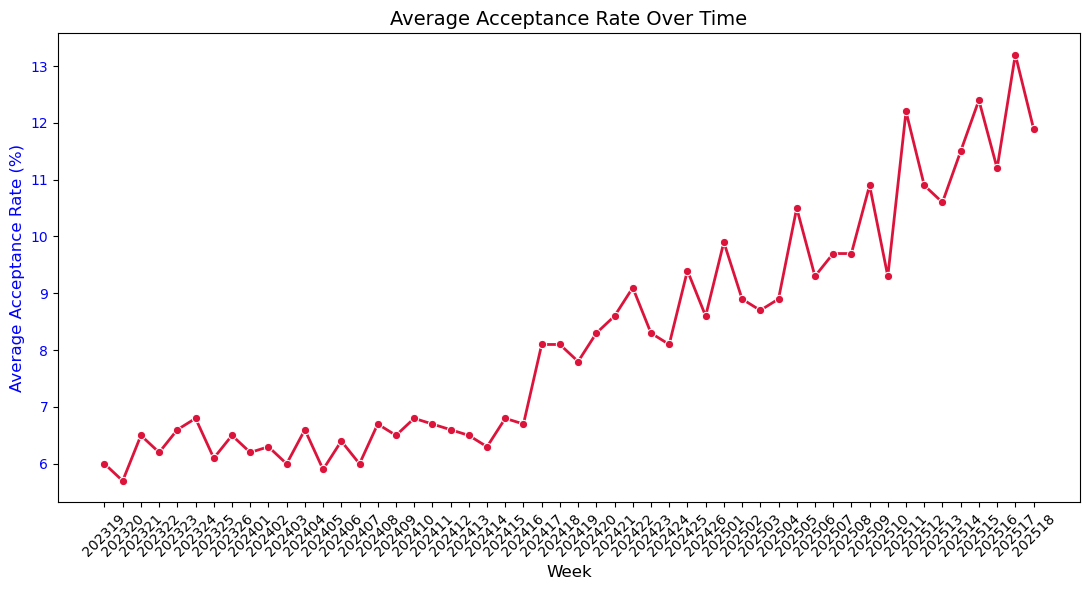

In [47]:
# AI acceptance
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.lineplot(data=pd_AI_acceptance_avg_pivot,
             x="week",
             y="avg_rate",
             marker="o",
             color="crimson",
             linewidth=2,
             ax=ax1)

ax1.set_xlabel("Week", fontsize=12)
ax1.set_ylabel("Average Acceptance Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
plt.title("Average Acceptance Rate Over Time", fontsize=14)
plt.tight_layout()
plt.show()

**Bar chart of AI usage & acceptance by sector**


In [48]:
AI_usage_by_sector = AI_usage.select('Sector','two_year_avg').toPandas()
AI_acceptance_by_sector = AI_acceptance.select('Sector','two_year_avg').toPandas()

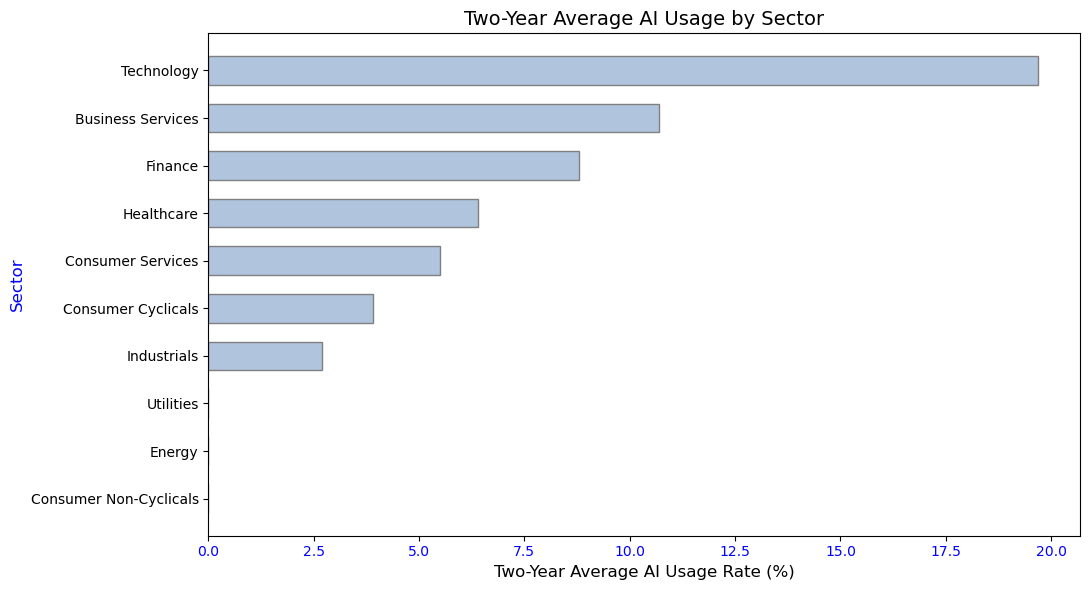

In [49]:
# AI usage
AI_usage_by_sector_sorted = AI_usage_by_sector.sort_values("two_year_avg", ascending=True)
fig, ax1 = plt.subplots(figsize=(11, 6))

bars = ax1.barh(AI_usage_by_sector_sorted["Sector"],
                AI_usage_by_sector_sorted["two_year_avg"],
                color="lightsteelblue",
                edgecolor="gray",
                height=0.6)
ax1.set_xlabel("Two-Year Average AI Usage Rate (%)", fontsize=12)
ax1.set_ylabel("Sector", color="blue", fontsize=12)
ax1.tick_params(axis="x", labelcolor="blue")
ax1.set_title("Two-Year Average AI Usage by Sector", fontsize=14)
plt.tight_layout()
plt.show()

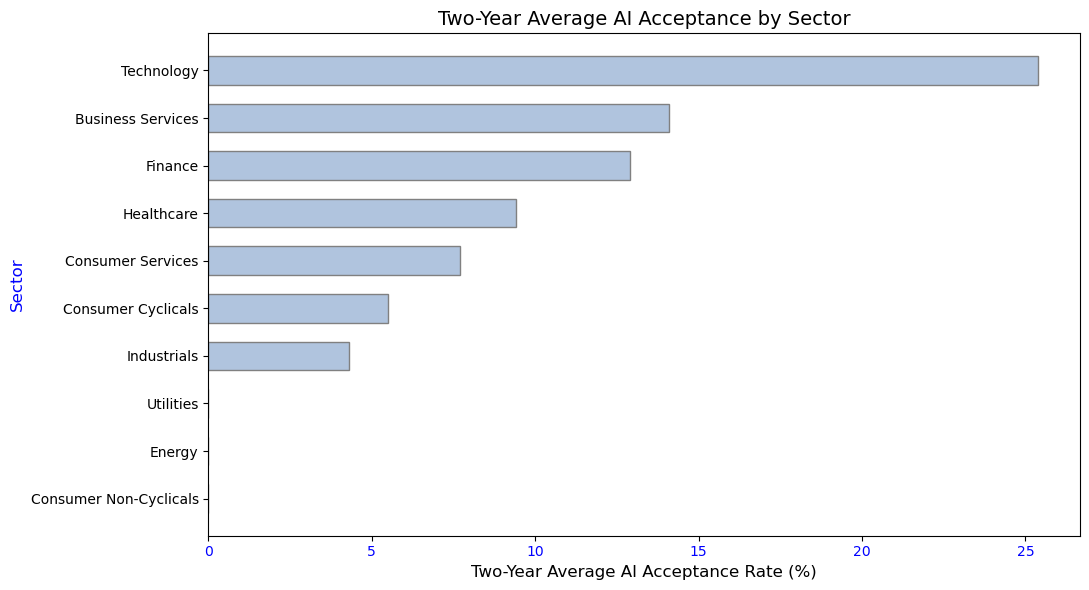

In [50]:
# AI acceptance
AI_acceptance_by_sector_sorted = AI_acceptance_by_sector.sort_values("two_year_avg", ascending=True)
fig, ax1 = plt.subplots(figsize=(11, 6))

bars = ax1.barh(AI_acceptance_by_sector_sorted["Sector"],
                AI_acceptance_by_sector_sorted["two_year_avg"],
                color="lightsteelblue",
                edgecolor="gray",
                height=0.6)

ax1.set_xlabel("Two-Year Average AI Acceptance Rate (%)", fontsize=12)
ax1.set_ylabel("Sector", color="blue", fontsize=12)
ax1.tick_params(axis="x", labelcolor="blue")
ax1.set_title("Two-Year Average AI Acceptance by Sector", fontsize=14)
plt.tight_layout()
plt.show()

<h4>Part 2: Financial Data Visualization

In [51]:
df = pd.read_excel(data_path + "02_AI_usage_upd.xlsx", engine="openpyxl")

# create EBTDA margin column 
df["EBITDA_margin"] = (df["avg_EBITDA_Oper_Income"] / df["avg_Sales"]) * 100
print(df[["Sector", "avg_EBITDA_Oper_Income", "avg_Sales", "EBITDA_margin"]])
# Create R&D intensity column (percent of sales)
df["R&D_intensity"] = (df["avg_Resrch_and_Develop_Expense"] / df["avg_Sales"].replace({0: np.nan})) * 100

# Compute EBITDA margin if missing
df_sorted = df.copy()
if "EBITDA_margin" not in df_sorted.columns:
    df_sorted["EBITDA_margin"] = (df_sorted["avg_EBITDA_Oper_Income"] / df_sorted["avg_Sales"]) * 100
# Sort by AI usage (lowest → highest)
df_sorted = df_sorted.sort_values("two_year_avg", ascending=False).reset_index(drop=True)

                   Sector  avg_EBITDA_Oper_Income  avg_Sales  EBITDA_margin
0       Business Services                  2871.9    10997.6      26.113879
1      Consumer Cyclicals                  5537.3    43314.5      12.783941
2  Consumer Non-Cyclicals                  8872.7    74292.3      11.942960
3       Consumer Services                  4115.3    21677.5      18.984200
4                  Energy                 11270.3    58801.7      19.166623
5                 Finance                  5258.4    29033.0      18.111804
6              Healthcare                  5777.9    52930.7      10.915971
7             Industrials                  3733.1    23110.6      16.153194
8              Technology                 12271.2    35417.4      34.647377
9               Utilities                  5303.0    14754.2      35.942308


**Market Value, EBITDA Margin, and Sales Growth by Sector (Ordered by AI Usage)**

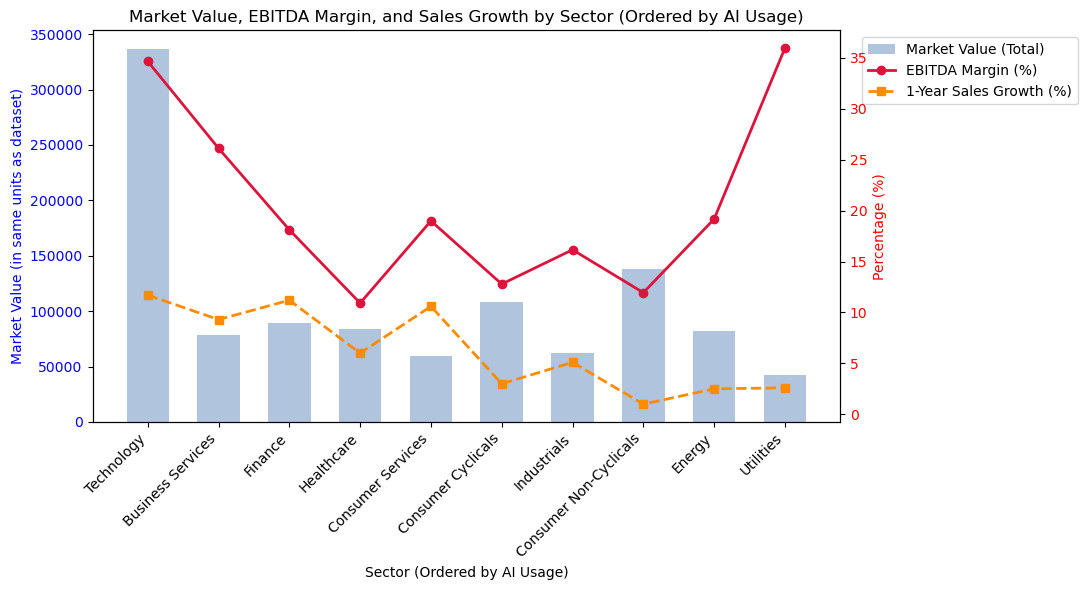

In [52]:
x = np.arange(len(df_sorted))
fig, ax1 = plt.subplots(figsize=(11, 6))

bars = ax1.bar(x,
               df_sorted["avg_Market_Value"],
               color="lightsteelblue",
               width=0.6,
               label="Market Value (Total)")
ax1.set_xlabel("Sector (Ordered by AI Usage)")
ax1.set_ylabel("Market Value (in same units as dataset)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(df_sorted["Sector"], rotation=45, ha="right")

ax2 = ax1.twinx()
line1, = ax2.plot(x,
                  df_sorted["EBITDA_margin"],
                  color="crimson",
                  marker="o",
                  linewidth=2,
                  label="EBITDA Margin (%)")
line2, = ax2.plot(x,
                  df_sorted["avg_1_Year_Growth_Total_Sales"],
                  color="darkorange",
                  linestyle="--",
                  marker="s",
                  linewidth=2,
                  label="1-Year Sales Growth (%)")
ax2.set_ylabel("Percentage (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Legend and title
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = [line1, line2], [line1.get_label(), line2.get_label()]
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left", bbox_to_anchor=(1.02, 1))
plt.title("Market Value, EBITDA Margin, and Sales Growth by Sector (Ordered by AI Usage)")
fig.tight_layout()
plt.show()

**ROE, P/E Ratio, and R&D Intensity by Sector**

In [53]:
# Ensure df_sorted is a Pandas DataFrame
try:
    if hasattr(df_sorted, "toPandas"):
        df_sorted_pd = df_sorted.toPandas()
    else:
        df_sorted_pd = df_sorted.copy()
except NameError:
    df_sorted_pd = df.copy()
    if "EBITDA_margin" not in df_sorted_pd.columns:
        df_sorted_pd["EBITDA_margin"] = (
            df_sorted_pd["avg_EBITDA_Oper_Income"] / df_sorted_pd["avg_Sales"]
        ) * 100
    df_sorted_pd = df_sorted_pd.sort_values("two_year_avg", ascending=True).reset_index(drop=True)

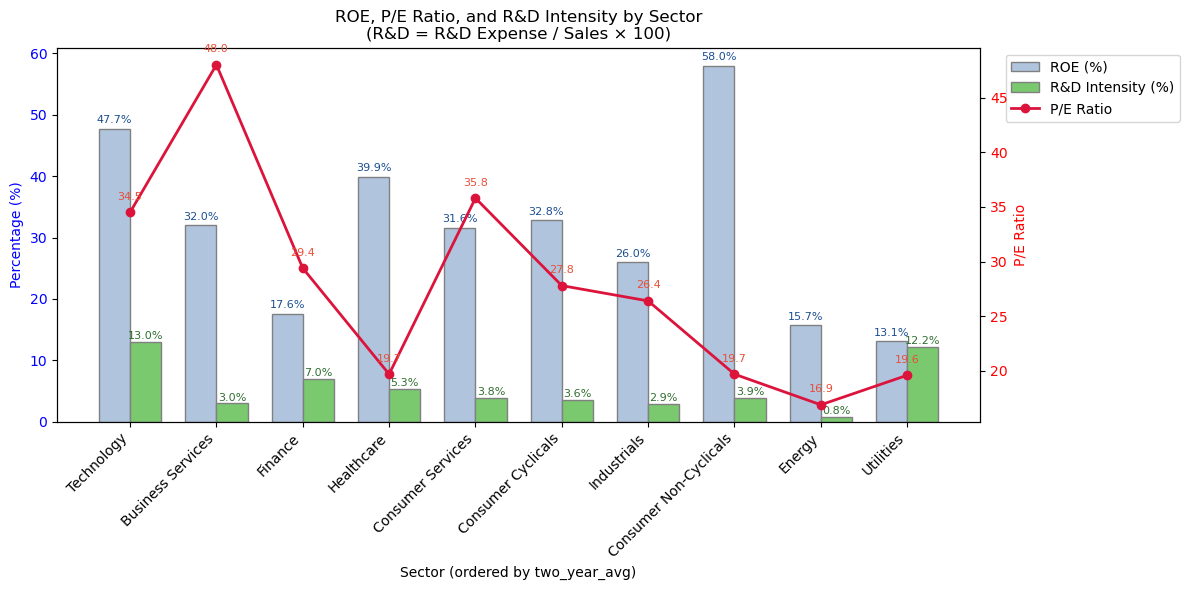

In [54]:
n = len(df_sorted_pd)
x = np.arange(n)
width = 0.36

fig, ax_left = plt.subplots(figsize=(12, 6))

bar1 = ax_left.bar(x - width/2,
                   df_sorted_pd["avg_FE_Val_Roe_Mean_FY1_Roll"],
                   width=width,
                   color="lightsteelblue",
                   edgecolor="gray",
                   label="ROE (%)")
bar2 = ax_left.bar(x + width/2,
                   df_sorted_pd["R&D_intensity"],
                   width=width,
                   color="#7bc96f",
                   edgecolor="gray",
                   label="R&D Intensity (%)")

ax_left.set_xlabel("Sector (ordered by two_year_avg)")
ax_left.set_ylabel("Percentage (%)", color="blue")
ax_left.tick_params(axis="y", labelcolor="blue")
ax_left.set_xticks(x)
ax_left.set_xticklabels(df_sorted_pd["Sector"], rotation=45, ha="right")

# Secondary axis for P/E ratio
ax_right = ax_left.twinx()
line_pe, = ax_right.plot(x,
                         df_sorted_pd["avg_FE_Val_Pe_Mean_FY1_Roll"],
                         color="crimson",
                         marker="o",
                         linewidth=2,
                         label="P/E Ratio")
ax_right.set_ylabel("P/E Ratio", color="red")
ax_right.tick_params(axis="y", labelcolor="red")

# legends
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = [line_pe], [line_pe.get_label()]
ax_left.legend(handles_left + handles_right,
               labels_left + labels_right,
               loc="upper left",
               bbox_to_anchor=(1.02, 1))

# Annotations
roe_max = np.nanmax(df_sorted_pd["avg_FE_Val_Roe_Mean_FY1_Roll"].values)
rnd_max = np.nanmax(df_sorted_pd["R&D_intensity"].values)
pe_max  = np.nanmax(df_sorted_pd["avg_FE_Val_Pe_Mean_FY1_Roll"].values)

offset_roe = 0.01 * roe_max if np.isfinite(roe_max) and roe_max != 0 else 0.1
offset_rnd = 0.01 * rnd_max if np.isfinite(rnd_max) and rnd_max != 0 else 0.1
offset_pe  = 0.02 * pe_max  if np.isfinite(pe_max)  and pe_max  != 0 else 0.1

for rect in bar1:
    h = rect.get_height()
    if pd.notna(h):
        ax_left.text(
            rect.get_x() + rect.get_width() / 2,
            h + offset_roe,
            f"{h:.1f}%",
            ha="center", va="bottom", fontsize=8, color="#1a4e91"
        )

for rect in bar2:
    h = rect.get_height()
    if pd.notna(h):
        ax_left.text(
            rect.get_x() + rect.get_width() / 2,
            h + offset_rnd,
            f"{h:.1f}%",
            ha="center", va="bottom", fontsize=8, color="#2f6e2f"
        )

for i, val in enumerate(df_sorted_pd["avg_FE_Val_Pe_Mean_FY1_Roll"]):
    if pd.notna(val):
        ax_right.text(
            x[i],
            val + offset_pe,
            f"{val:.1f}",
            ha="center", va="bottom", fontsize=8, color="#e94f37"
        )

plt.title("ROE, P/E Ratio, and R&D Intensity by Sector\n(R&D = R&D Expense / Sales × 100)")
fig.tight_layout()
plt.show()

<h4>Part 3: Bubble Chart for Usage and Acceptance Rates VS Firm Size

In [55]:
AI_usage_market_value = AI_usage.select('Sector','two_year_avg','avg_Market_Value').toPandas()
AI_acceptance_market_value = AI_acceptance.select('Sector','two_year_avg','avg_Market_Value').toPandas()

**AI usage VS market value**

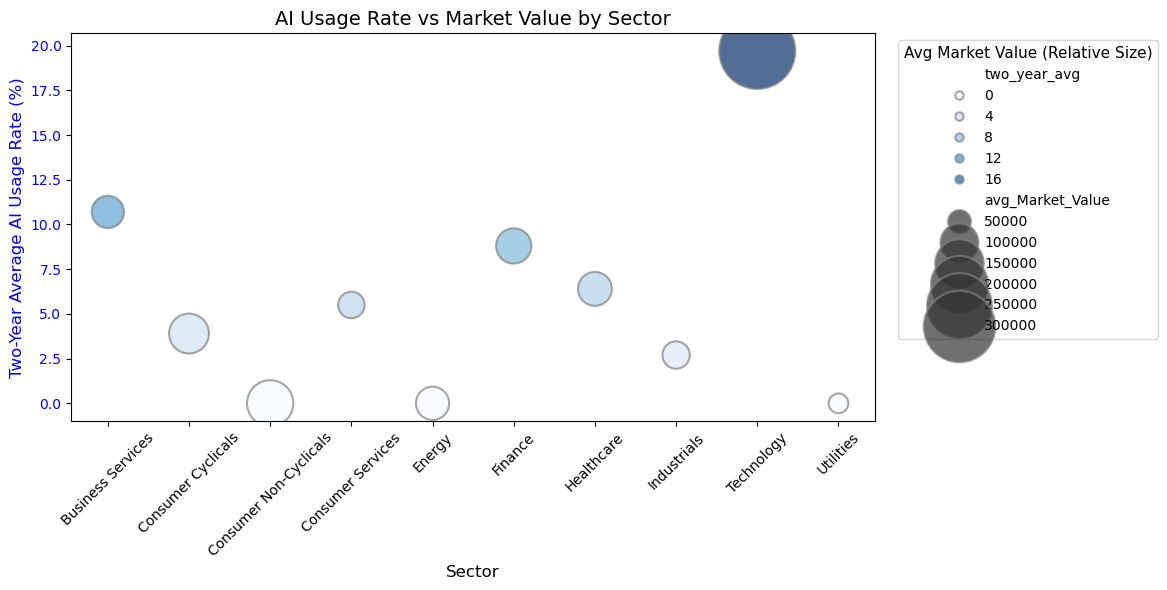

In [56]:
AI_usage_market_value["bubble_size"] = AI_usage_market_value["avg_Market_Value"] / 500
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.scatterplot(data=AI_usage_market_value,
                x="Sector", y="two_year_avg",
                size="avg_Market_Value",
                hue="two_year_avg",
                sizes=(200, 3000),
                palette="Blues",
                alpha=0.7,
                edgecolor="gray",
                ax=ax1)

ax1.set_xlabel("Sector", fontsize=12)
ax1.set_ylabel("Two-Year Average AI Usage Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("AI Usage Rate vs Market Value by Sector", fontsize=14)

legend = ax1.legend(title="Avg Market Value (Relative Size)",
                    bbox_to_anchor=(1.02, 1),
                    loc="upper left",
                    frameon=True)

plt.setp(legend.get_title(), fontsize=11, color="black") 
for text in legend.get_texts():
    text.set_color("black")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
plt.show()

**AI acceptance VS market value**

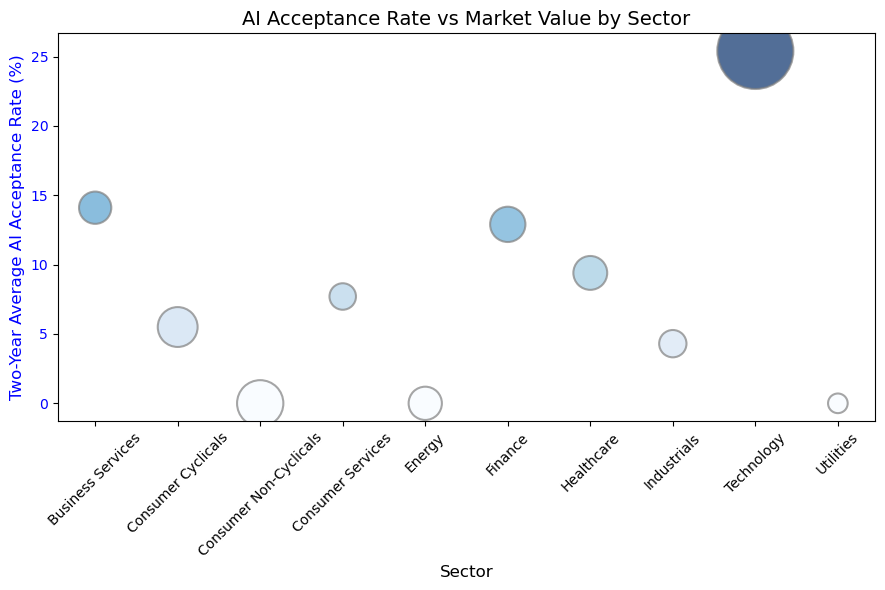

In [57]:
AI_acceptance_market_value["bubble_size"] = AI_acceptance_market_value["avg_Market_Value"] / 500
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.scatterplot(data=AI_acceptance_market_value,
                x="Sector", y="two_year_avg",
                size="avg_Market_Value",
                hue="two_year_avg",
                sizes=(200, 3000),
                palette="Blues",
                alpha=0.7,
                edgecolor="gray",
                ax=ax1,
                legend=False)

ax1.set_xlabel("Sector", fontsize=12)
ax1.set_ylabel("Two-Year Average AI Acceptance Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("AI Acceptance Rate vs Market Value by Sector", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
plt.show()

In [58]:
AI_usage_growth = AI_usage.select('Sector','two_year_avg','avg_1_Year_Growth_Total_Sales').toPandas()
AI_acceptance_growth = AI_acceptance.select('Sector','two_year_avg','avg_1_Year_Growth_Total_Sales').toPandas()

**AI usage VS growth**

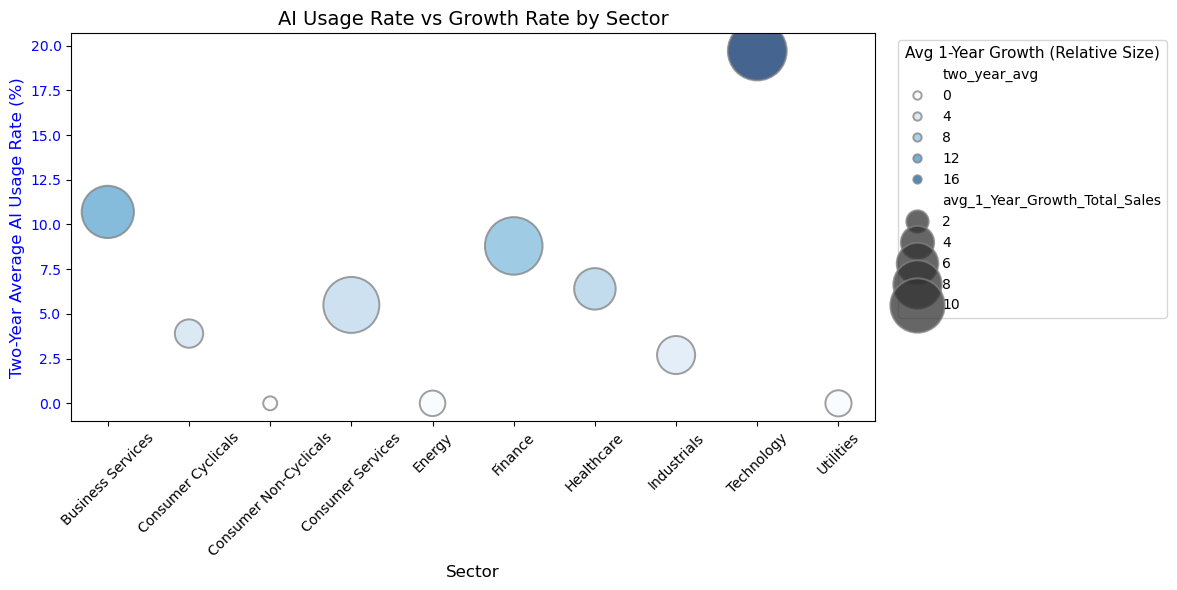

In [59]:
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.scatterplot(data=AI_usage_growth,
                x="Sector", y="two_year_avg",
                size="avg_1_Year_Growth_Total_Sales",
                hue="two_year_avg",
                sizes=(100, 1800),
                palette="Blues",
                alpha=0.75,
                edgecolor="gray",
                ax=ax1)

ax1.set_xlabel("Sector", fontsize=12)
ax1.set_ylabel("Two-Year Average AI Usage Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("AI Usage Rate vs Growth Rate by Sector", fontsize=14)

legend = ax1.legend(title="Avg 1-Year Growth (Relative Size)",
                    bbox_to_anchor=(1.02, 1),
                    loc="upper left",
                    frameon=True)
plt.setp(legend.get_title(), fontsize=11, color="black")
for text in legend.get_texts():
    text.set_color("black")

fig.tight_layout()
fig.subplots_adjust(right=0.8)
plt.show()


**AI acceptance VS growth**

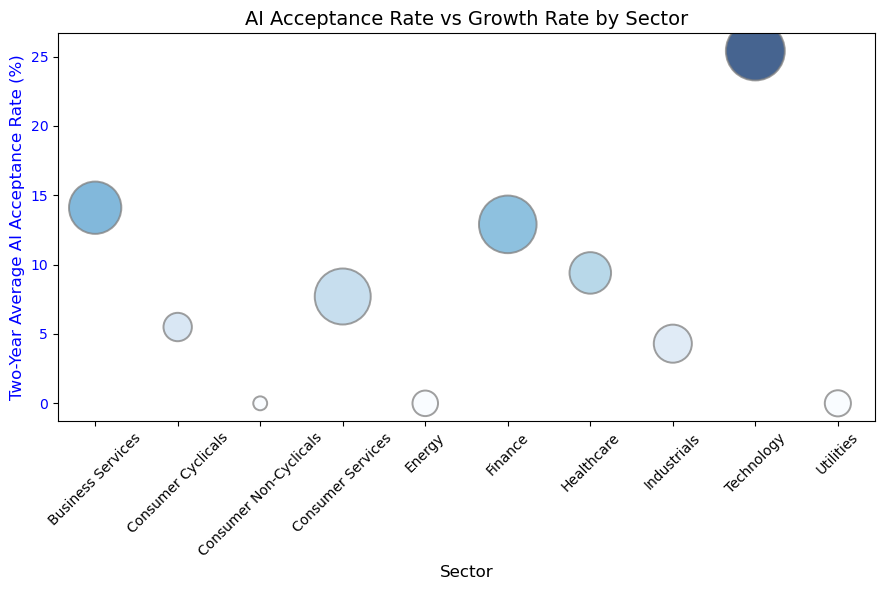

In [60]:
fig, ax1 = plt.subplots(figsize=(11, 6))

sns.scatterplot(data=AI_acceptance_growth,
                x="Sector", y="two_year_avg",
                size="avg_1_Year_Growth_Total_Sales",
                hue="two_year_avg",
                sizes=(100, 1800),
                palette="Blues",
                alpha=0.75,
                edgecolor="gray",
                ax=ax1,
                legend=False)

ax1.set_xlabel("Sector", fontsize=12)
ax1.set_ylabel("Two-Year Average AI Acceptance Rate (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("AI Acceptance Rate vs Growth Rate by Sector", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
plt.show()
